<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#dataset-&quot;beer.csv&quot;" data-toc-modified-id="dataset-&quot;beer.csv&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>dataset "beer.csv"</a></span><ul class="toc-item"><li><span><a href="#wybieramy-pary-zmiennych-i-sprawdzić-ich-zależność-regresją-liniową-i-r^2" data-toc-modified-id="wybieramy-pary-zmiennych-i-sprawdzić-ich-zależność-regresją-liniową-i-r^2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>wybieramy pary zmiennych i sprawdzić ich zależność regresją liniową i r^2</a></span></li><li><span><a href="#sprawdzamy-czy-i-gdzie-sa-nulle" data-toc-modified-id="sprawdzamy-czy-i-gdzie-sa-nulle-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>sprawdzamy czy i gdzie sa nulle</a></span></li><li><span><a href="#modelowanie" data-toc-modified-id="modelowanie-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>modelowanie</a></span></li></ul></li><li><span><a href="#Multi-regression" data-toc-modified-id="Multi-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multi regression</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# jeśli nie korzystasz z poniższej paczki, to wykomentuj te dwie linie poniżej
# from jupyterthemes import jtplot
# jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

## dataset "beer.csv"
### wybieramy pary zmiennych i sprawdzić ich zależność regresją liniową i r^2

In [3]:
df = pd.read_csv('data/beer.csv')

In [4]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


Precipitacao (mm) - Opady (mm)

Final de Semana - koniec tygodnia

Consumo de cerveja (litros) - Spożycie piwa (litry)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [6]:
for k in df.keys():
    tmpNum = df.columns.get_loc(k)
    print(tmpNum, k)

0 Data
1 Temperatura Media (C)
2 Temperatura Minima (C)
3 Temperatura Maxima (C)
4 Precipitacao (mm)
5 Final de Semana
6 Consumo de cerveja (litros)


### sprawdzamy czy i gdzie sa nulle

In [7]:
df.shape

(941, 7)

In [8]:
df.size

6587

In [9]:
#czy i ile jest nulli
print('How many nulls ', df.isnull().sum().sum())

How many nulls  4032


In [10]:
df.isnull().sum().sum()

4032

In [11]:
whereAreNulls = df.isnull().to_numpy().astype(float)
whereAreNulls

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [12]:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


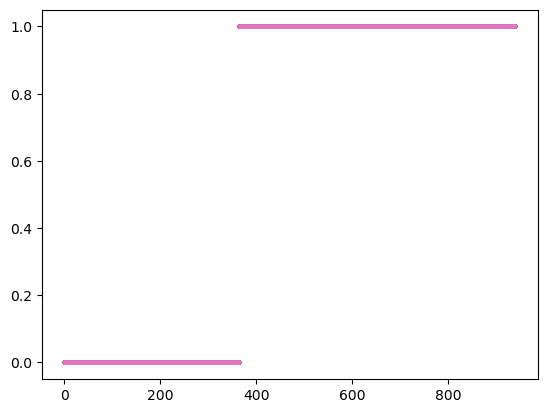

In [13]:
plt.plot(whereAreNulls, marker='.', markersize=4, linestyle='none')

In [15]:
df = df.dropna()

In [16]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [18]:
df['Data'] = pd.to_datetime(df['Data'])

In [19]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [20]:
(df['Data'] - pd.to_datetime('1970-01-01')).dt.total_seconds()

0     1420070400.00
1     1420156800.00
2     1420243200.00
3     1420329600.00
4     1420416000.00
           ...     
360   1451174400.00
361   1451260800.00
362   1451347200.00
363   1451433600.00
364   1451520000.00
Name: Data, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


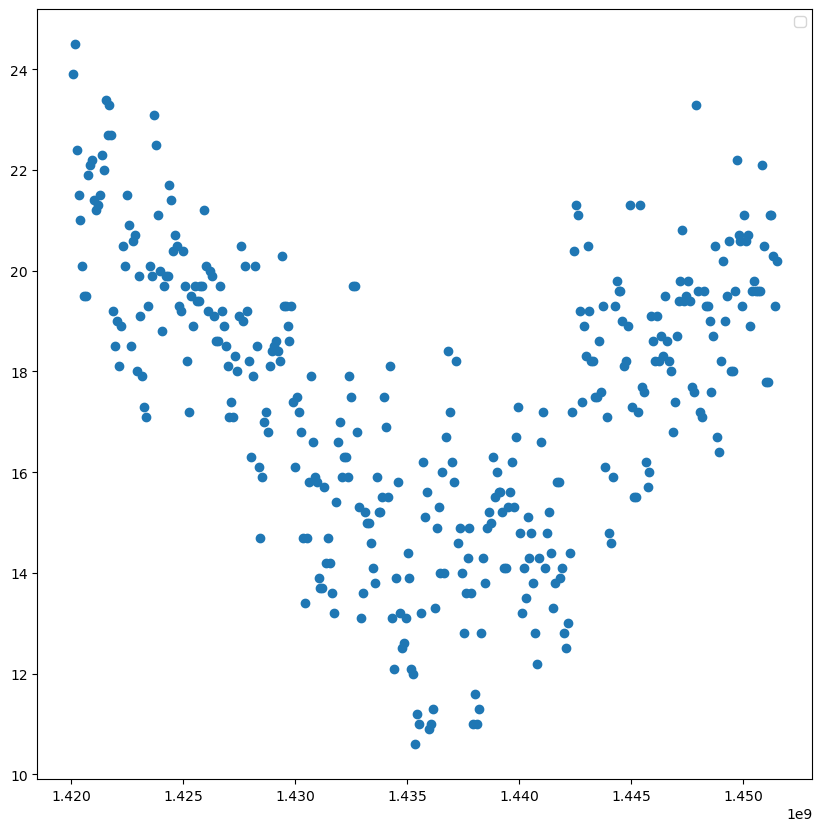

In [21]:
#zalezne od temperatury Maxima (C)
# x = np.array(df.iloc[:, 3].replace({',': '.'}, regex=True)).astype(float)

#zalezne od czasu
x = np.array((df['Data'] - pd.to_datetime('1970-01-01')).dt.total_seconds())

#jako odpowiedz ilosc skonsumowanego piwa
# y = np.array(df.iloc[:, 6])

#jako odpowiedz temperatura Minima (C)       
y = np.array(df.iloc[:, 2].replace({',': '.'}, regex=True)).astype(float)

fig = plt.figure(figsize=(10,10))
plt.plot(x,y, linestyle='none', marker = 'o')
plt.legend()

### modelowanie

In [22]:
#przygotowanie danych
x = x.reshape(-1,1)
y = y.reshape(-1,1)
#model
model =LinearRegression()
#uczenie
model.fit(x,y)

LinearRegression()

In [23]:
model.score(x,y)

0.02892737726507888

In [24]:
a = model.coef_[0][0]
b = model.intercept_[0]

In [25]:
def linear_function(a,b,x):
    return a*x + b

In [26]:
x_reg = x
y_reg = linear_function(a,b,x_reg)

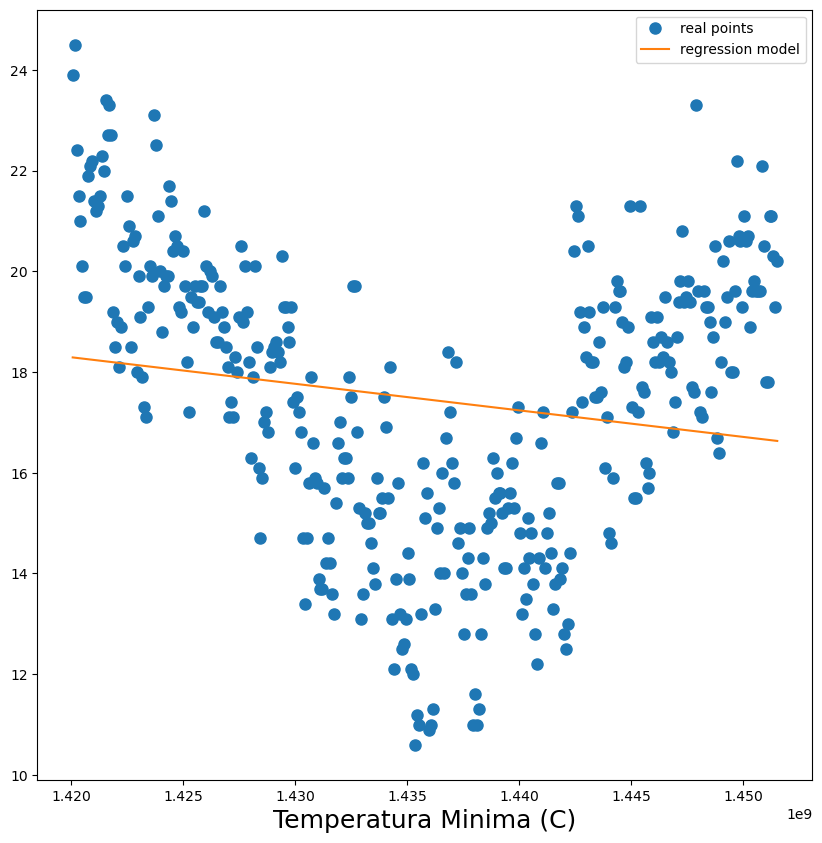

In [27]:
fig = plt.figure(figsize = (10,10))
plt.plot(x,y, linestyle='none', marker='o', markersize=8, label='real points')
plt.plot(x_reg, y_reg, label = 'regression model')
plt.legend()
plt.xlabel(df.keys()[0], fontsize=18)
plt.xlabel(df.keys()[2], fontsize=18)
plt.show()

## Multi regression
Dopasowywanie modelu regresji liniowej wielu zmiennych.

In [28]:
list(df.keys())

['Data',
 'Temperatura Media (C)',
 'Temperatura Minima (C)',
 'Temperatura Maxima (C)',
 'Precipitacao (mm)',
 'Final de Semana',
 'Consumo de cerveja (litros)']

In [29]:
x1 = np.array(df.iloc[:,2].replace({',':'.'}, regex=True)).astype(float)
x2 = np.array(df.iloc[:,3].replace({',':'.'}, regex=True)).astype(float)

In [30]:
x = np.concatenate(
    (
        x1.reshape(-1,1),
        x2.reshape(-1,1),
    ),
    axis=1
)
x.shape

(365, 2)

In [31]:
# modelujemy
multi_regr = LinearRegression(normalize=True)
multi_regr.fit(x,y)

c:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [33]:
# sprawdzam r2
r2_score(y, multi_regr.predict(x))

1.0

In [34]:
# rysujemy przestrzeń 3D
from mpl_toolkits.mplot3d import axes3d

In [39]:
# tworzymy macierze danych
X1, X2 = np.meshgrid(x1, x2, indexing='xy')
Z = np.zeros((x1.size, x2.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] = multi_regr.predict(np.stack([X1[i,j], X2[i,j]]).reshape(1, -1))

In [38]:
# Create plot
fig = plt.figure()
fig.suptitle('Consumo vs Temperatura', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(X1, X2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(x1, x2, y, c='y')

ax.set_xlabel('Temperatura Minima')
ax.set_xlim(0,50)
ax.set_ylabel('Temperatura Maxima')
ax.set_ylim(ymin=0)
ax.set_zlabel('Consumo');

ax.view_init(20, -25)

plt.show()

<Figure size 640x480 with 0 Axes>